<a href="https://colab.research.google.com/github/marquestfelipe/Base-de-Funcionarios/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas
Por: Felipe Teixeira Marques

## 1. Definição do Problema

 Neste projeto, serão utilizados conjuntos de dados da empresa Bemobi, oriundos do relatório de folha e armazenados na rede corporativa. O propósito central é conduzir uma análise comparativa dos posicionamentos salariais entre diferentes diretorias, buscando identificar padrões e variações. Além disso, a pesquisa visa avaliar se existe uma correlação significativa entre a posição salarial e os índices de retenção de colaboradores na empresa. Ao explorar esses dados, buscamos não apenas entender a distribuição salarial nas diversas áreas, mas também investigar como esses fatores podem influenciar diretamente a permanência e satisfação dos colaboradores.

 Para realizar esse estudo utilizaremos métodos de aprendizagem supervisionados.

A premissa atual é que os funcionários desligados, devem estar em posicições iniciais de suas respectivas faixas saláriais, ou seja, possuirem um PIR inferior a 90%.

Como possuímos informações sensíveis nos dados, foi necessário substituir os nomes dos funcionários, outra decisão foi a de excluir a matrícula deles, já que para o estudo não há necessidade de individualizar cada um.


## Informações sobre os atributos:

* Empresa - Nome da empresa (CNPJ)
* Nome - Valores redefinidos por questões de governança de dados
* Cargo - Cargo do funcionário
* Sexo - Masculino / Feminino
* Nível - Nível Hierarquico (Jr, Pl, Sr, Esp, Gerente)
* Salario - Salário do funcionária (valor inteiro)
* Diretoria - Diretoria do cargo
* Categoria - classificação de remuneração para definir a tabela salarial
* Grade - Grade de remuneração (valores entre 5 e 15)
* Mediana - Mediana salarial da posição em questão (valor inteiro)
* PIR - Position in Range, percentual na faixa (salário / mediana)
* Idade - Idade do funcionário (anos)
* Admissão - Data de admissão (dd/mm/aaaa)
* TdC - Tempo de Casa (meses na empresa)
* Demissão - Data da demissão (dd/mm/aaaa)
* Motivo - Demissão voluntária ou involuntária

 ## A seguir temos a importação de de pacotes que serão utilizados ao longo do projeto:

In [51]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
import io
import requests


## Transformações
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load
from sklearn.datasets import load_iris # para importar o dataset iris
from sklearn.metrics import confusion_matrix # para a exibição da matriz de confusão do modelo
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.svm import SVC # para utilizar o algoritmo SVM
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier




## 2. Carga de Dados

Utilizando o pacote Pandas (Python Data Analysis Library), foi realizado o upload dos arquivos salvos gerados pelo sistema de folha e salvos online

Após a carga do dataset, podemos iniciar a exploração dos dados:


In [52]:
#upload do database que contempla os funcionários ativos da empresa
url = "https://raw.githubusercontent.com/marquestfelipe/Base-de-Funcionarios/main/Base%20MVP%20-%20Ativos.csv"
s_ativo = requests.get(url).content
Ativo  = pd.read_csv(io.StringIO(s_ativo.decode('utf-8')))
Ativo



,Empresa,Nome,Cargo,Sexo,Nivel,Salario,Diretoria,Categoria,Grade,Mediana,PIR,Admissao,Idade,TdC
0,BEMOBI,Ativo 1,ANALISTA DE SUPORTE N1 JR,F,Junior,5123,TECNOLOGIA,Regular,8,4138,124%,01/06/2021,27,29
1,BEMOBI,Ativo 2,ANALISTA DESENVOLVIMENTO PL,M,Pleno,7789,TECNOLOGIA,Dev,10,8375,93%,20/09/2022,23,13
2,BEMOBI,Ativo 3,GERENTE MARKETING,F,Gerente,20000,COMERCIAL,Regular,13,18890,106%,21/02/2013,35,128
3,BEMOBI,Ativo 4,ANALISTA FINANCEIRO SR,F,Senior,8889,FINANCEIRO,Regular,10,6696,133%,05/01/2021,29,34
4,BEMOBI,Ativo 5,ANALISTA RH PL,F,Pleno,5518,PEOPLE & CULTURE,Regular,9,5643,98%,22/11/2018,33,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,MULTI,Ativo 375,ASSISTENTE ADMINISTRATIVO,M,Assistente,2712,FINANCEIRO,Regular,5,2200,123%,20/09/2021,29,25
375,MULTI,Ativo 376,ANALISTA DE PRODUTOS JR,F,Junior,4500,PRODUTOS,Alta Exp,9,5250,86%,17/10/2023,28,0
376,MULTI,Ativo 377,ANALISTA DE RH JR,F,Junior,3888,PEOPLE & CULTURE,Regular,8,4138,94%,24/05/2021,56,29
377,MULTI,Ativo 378,COORDENADOR DE PRODUTOS,F,Esp/Coord,14702,PRODUTOS,Regular,11,12000,123%,11/01/2021,34,34


In [53]:
#upload do database que contempla os funcionários desligados da empresa
url = "https://raw.githubusercontent.com/marquestfelipe/Base-de-Funcionarios/main/Base%20MVP%20-%20Desligados.csv"
s_desl   = requests.get(url).content
Desl  = pd.read_csv(io.StringIO(s_desl.decode('utf-8')))
Desl


,Empresa,Nome,Cargo,Sexo,Nivel,Salario,Diretoria,Categoria,Grade,Mediana,PIR,Admissao,Idade,TdC,Demissao,Motivo
0,BEMOBI,Desligado 1,Coordenador Desenvolvimento,F,Esp/Coord,12147,TECNOLOGIA,Dev,13,19328,63%,15/01/2009,41,159,25/04/2022,Voluntario
1,BEMOBI,Desligado 2,Analista de Suporte N1 PL,M,Pleno,6385,TECNOLOGIA,Regular,9,5643,113%,17/10/2014,39,92,10/07/2022,Voluntario
2,BEMOBI,Desligado 3,Analista Desenvolvimento SR,F,Senior,10836,TECNOLOGIA,Dev,11,10450,104%,12/11/2019,28,25,07/01/2022,Voluntario
3,BEMOBI,Desligado 4,Analista Desenvolvimento JR,F,Junior,5000,TECNOLOGIA,DEV,9,5250,95%,12/01/2021,24,12,28/01/2022,Voluntario
4,BEMOBI,Desligado 5,Analista Marketing JR,M,Junior,3313,PRODUTOS,Regular,8,4138,80%,04/02/2019,26,38,14/04/2022,involuntario
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,BEMOBI,Desligado 215,ESPECIALISTA DESENVOLVIMENTO,M,Esp/Coord,13000,TECNOLOGIA,Dev,12,14187,92%,14/02/2023,33,7,26/09/2023,involuntario
215,MULTI,Desligado 216,ESPECIALISTA DESENVOLVIMENTO I,F,Esp/Coord,14592,TECNOLOGIA,Dev,12,14187,103%,04/01/2021,33,33,04/10/2023,Voluntario
216,M4P,Desligado 217,COORDENADOR FINANCEIRO,F,Esp/Coord,12481,FINANCEIRO,Regular,11,12000,104%,11/09/2017,33,72,10/10/2023,involuntario
217,M4P,Desligado 218,ANALISTA DESENVOLVIMENTO PL,M,Pleno,8994,TECNOLOGIA,Dev,10,8375,107%,12/07/2022,33,15,07/11/2023,involuntario


## 3. Análise de Dados

### 3.1 Estatísticas Descritiva

Iniciaremos avaliando as dimensões das bases de dados:

In [54]:

# Mostra as dimensões dos datasets
print("Dimensões do dataset Ativo:", Ativo.shape)
print("Dimensões do dataset Desligados:", Desl.shape)

Dimensões do dataset Ativo: (379, 14)
Dimensões do dataset Desligados: (219, 16)


In [55]:
# Mostra as informações do dataset
print("Informações do dataset Ativo:",Ativo.info())

print("\n" + "-"*40 + "\n")

print("Informações do dataset Desligados:",Desl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Empresa    379 non-null    object
 1   Nome       379 non-null    object
 2   Cargo      379 non-null    object
 3   Sexo       379 non-null    object
 4   Nivel      379 non-null    object
 5   Salario    379 non-null    int64 
 6   Diretoria  379 non-null    object
 7   Categoria  379 non-null    object
 8   Grade      379 non-null    int64 
 9   Mediana    379 non-null    int64 
 10  PIR        379 non-null    object
 11  Admissao   379 non-null    object
 12  Idade      379 non-null    int64 
 13  TdC        379 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 41.6+ KB
Informações do dataset Ativo: None

----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype

Em uma primeira análise, não foi observado nenhum valor nulo ou faltante em nenhuma das duas bases, mostrando que existe uma integridade dos dados.

Ao incluir os datasets já abrimos a possibilidade de olhar as primeiras 4 linhas, bem como as últimas 4 linhas.
Não foi observado nenhuma valor faltante ou "diferente" em relação as colunas, informação essa confirmada pela tabelas acima, com isso concluímos que não há necessidade de converter nenhuma informação ou mesmo completar valores nulos.

Agora iremos avaliar o tipo dos dados em cada um dos datasets:

In [56]:
#Agora podemos montar um resumo estatístico dos datasets, primeiramente dos funcionários ativos:

Ativo.describe()

,Salario,Grade,Mediana,Idade,TdC
count,379.000000,379.000000,379.000000,379.000000,379.000000
mean,10729.662269,10.393140,10051.509235,33.878628,42.543536
std,6065.260794,1.802719,5567.910005,7.422691,43.079846
min,2553.000000,5.000000,2200.000000,20.000000,0.000000
25%,5465.000000,9.000000,5643.000000,28.000000,16.000000
50%,9454.000000,10.000000,8375.000000,33.000000,27.000000
75%,14514.500000,11.000000,12000.000000,39.000000,49.000000
max,29758.000000,14.000000,26287.000000,58.000000,221.000000


In [57]:
#Em seguida dos funcionários desligados:

Desl.describe()

,Salario,Grade,Mediana,Idade,TdC
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,10553.296804,10.406393,9979.926941,33.383562,31.817352
std,5771.428780,1.746334,5227.694583,7.443297,36.742889
min,2000.000000,5.000000,2200.000000,18.000000,1.000000
25%,6015.000000,9.000000,5643.000000,28.000000,9.000000
50%,9600.000000,10.000000,8375.000000,33.000000,20.000000
75%,14001.000000,11.000000,12000.000000,37.500000,34.000000
max,30998.000000,14.000000,26287.000000,59.000000,210.000000


Uma primeira descoberta está relacionada a idade média dos colaboradores, pois por se tratar de uma empresa de tecnologia, a percepção geral é que somos uma empresa jovem, e existia uma "verdade absoluta" de que a idade média era de 25 anos, mas ao olharmos os dados, notamos que na verdade a idade média é de 33 anos tanto para funcionários ativos quanto para desligados.

## 3.2 Visualizações Unimodais

Primeiramente iremos utilizar histogramas para avaliar cada um dos atributos dos datasets.

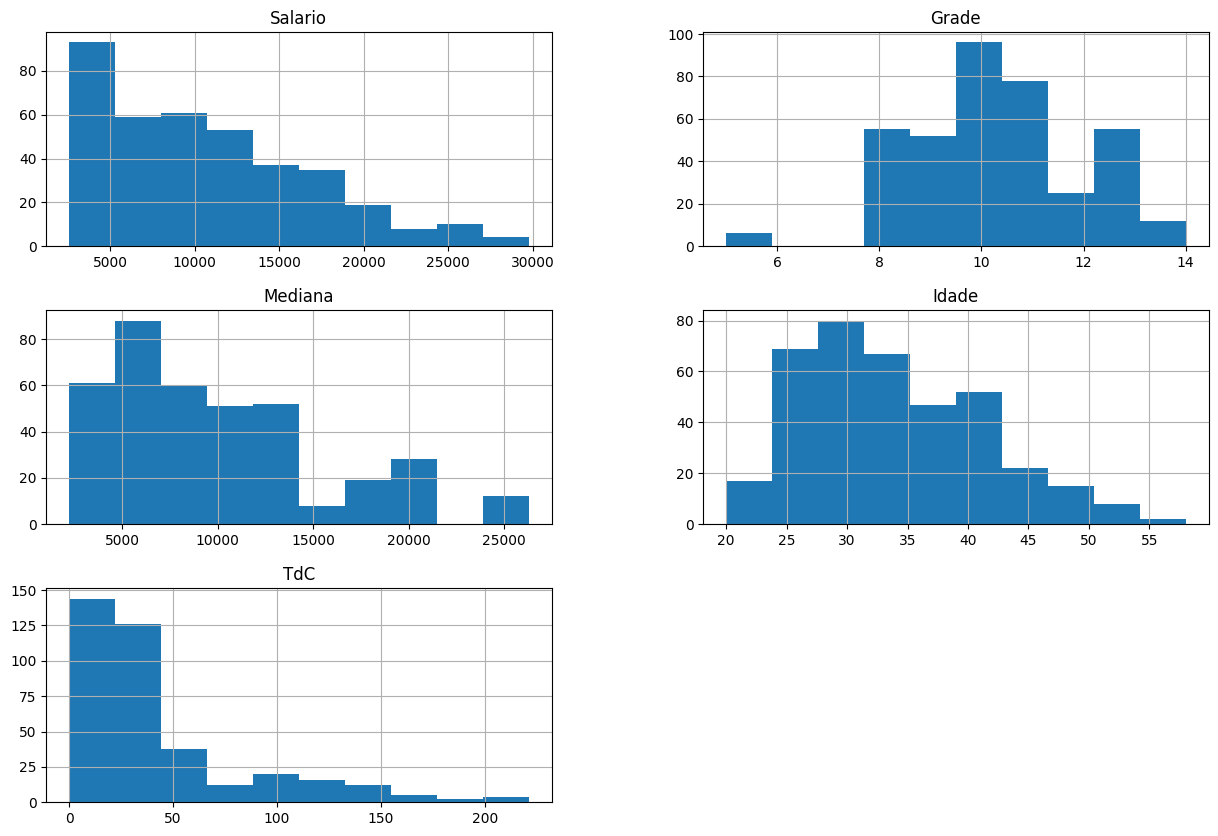

In [58]:
Ativo.hist(figsize = (15,10))
plt.show()

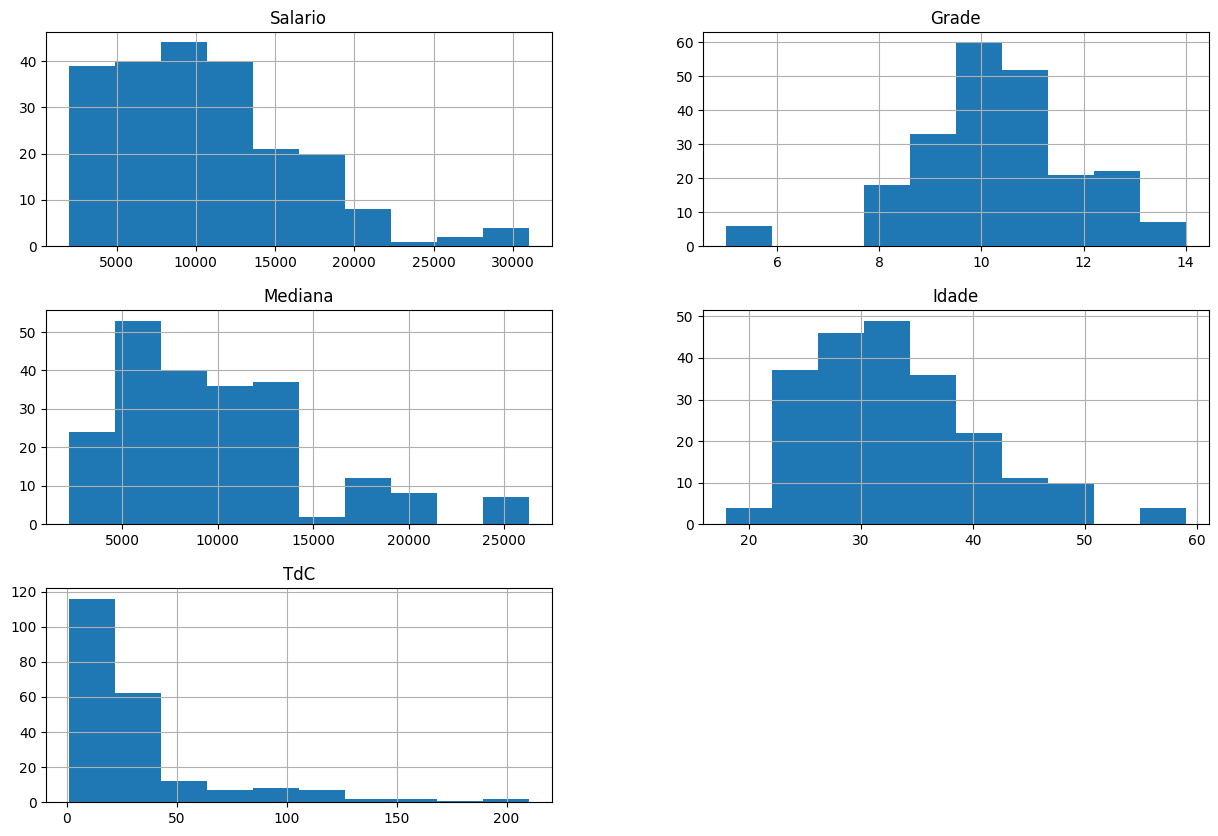

In [59]:
Desl.hist(figsize = (15,10))
plt.show()

Para auxiliar na visualização dos dados, seguiremos com os gráficos de densidade (Density Plot), buscando ppor padrões nos datasets

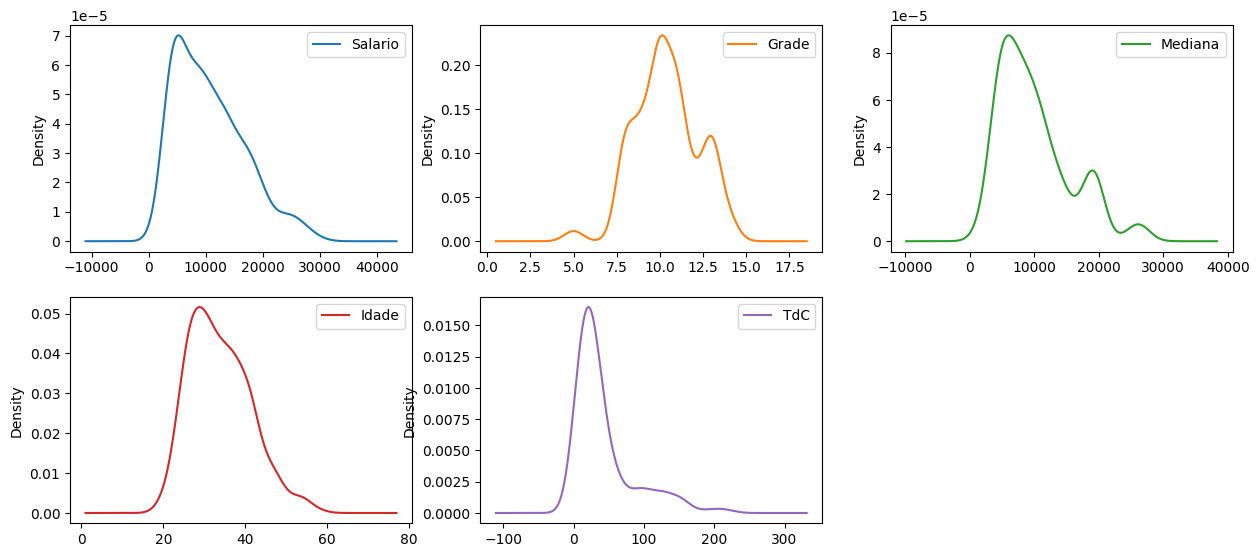

In [60]:
# Density Plot
Ativo.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

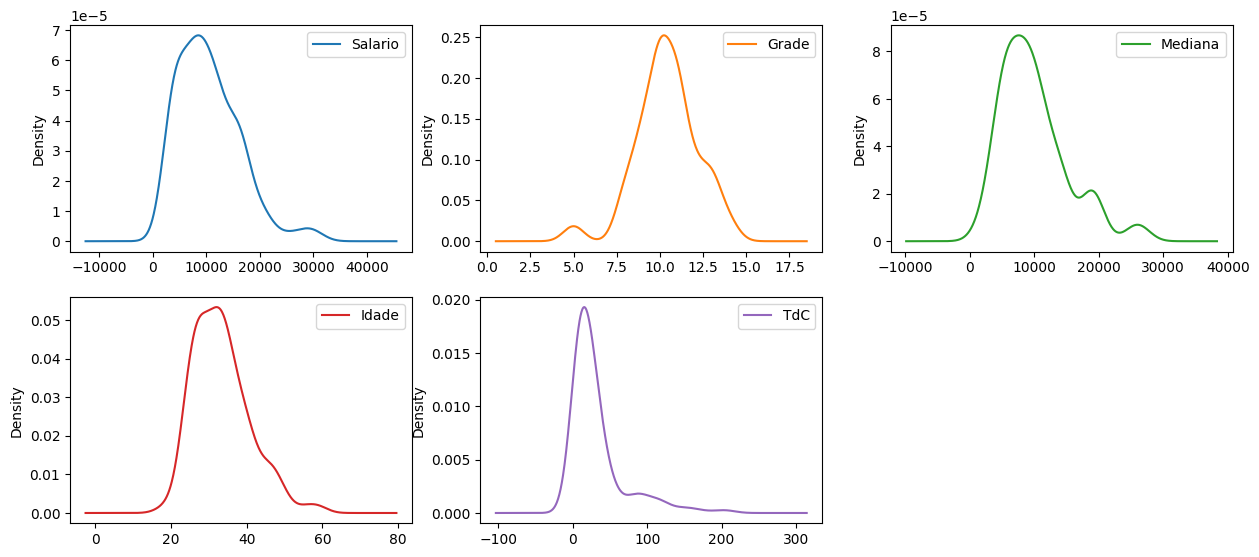

In [61]:
# Density Plot
Desl.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Coms os histogramas e gráfficos de densidade podemos notar algumas coisas relevantes sobre os dados:

1. Salários, a curva é mais acentuada nos funcionários ativos, o que em um primeiro momento, mostra que o valor absoluto do salário não é algo que seja determinante para manter os funcionários na empresa;

2. Idade, em relação os funcionários ativos, notamos uma maior concentração nos funcionários com 30+ anos de idade, já nos desligados a maior concentração está antes dos 30 anos;


Além das visualizações feitas anteriormente, seguiremos com a construções de Box Plots, para identificar outliers e o distaciamento dos dados em relação ao primeiro e terceiro quartis

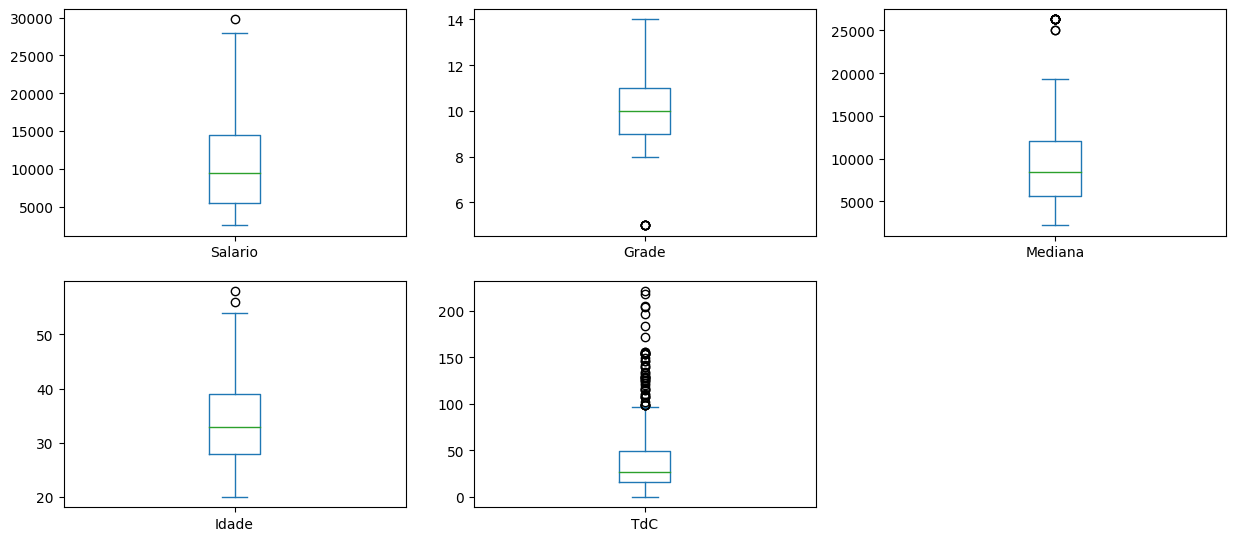

In [62]:
# Boxplot
Ativo.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

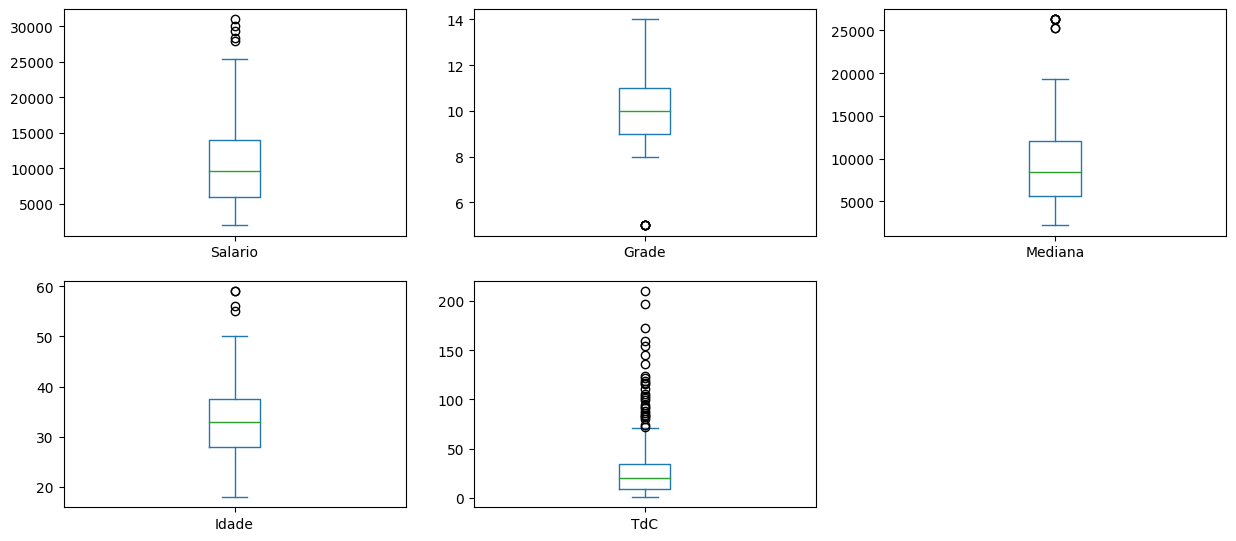

In [63]:
# Boxplot
Desl.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Com os boxplots, percebemos que quando falamos de salários, existem 4 vezes mais outliers nos funcionários desligados quando comparado com os ativos, reforçando a tese de que apenas o valor absoluto do salário não é suficiente para reter funcionários.

## 3.3 Visualizações Multimodais

A exploração das variáveis multimodais, busca padrões complexos. Seguiremos com essa abordagem por diversas razões. As variáveis multimodais, ao abrigarem diferentes modos ou tendências, possuem o potencial de oferecer uma visão abrangente das relações entre atributos salariais e demográficos.

Ao explorar essas variáveis, buscamos identificar padrões, agrupamentos e tendências latentes que possam influenciar diretamente a dinâmica salarial na empresa. A natureza multifacetada dessas variáveis nos permite capturar nuances que poderiam passar despercebidas em análises mais simplificadas.

Ademais, ao empregar técnicas visuais e métricas específicas, almejamos não apenas compreender a correlação entre variáveis multimodais, mas também destacar possíveis áreas de interesse para análises posteriores. Este enfoque estratégico visa fornecer uma compreensão inicial das relações entre atributos, pavimentando o caminho para análises mais aprofundadas e conclusivas em estágios posteriores.

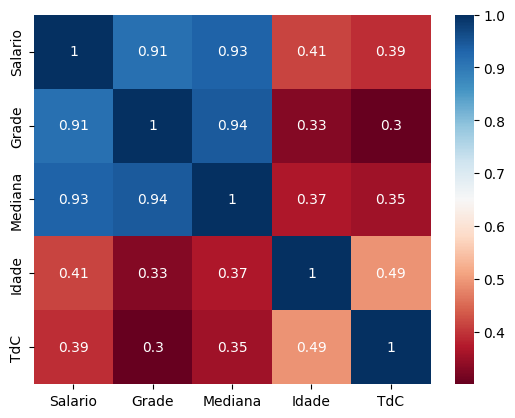

In [64]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(Ativo.corr(), annot=True, cmap='RdBu');

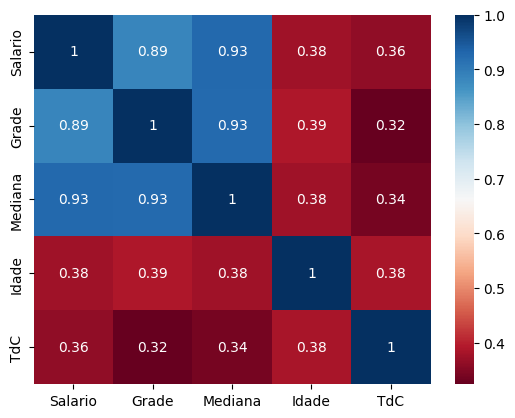

In [65]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(Desl.corr(), annot=True, cmap='RdBu');

Notamos que nos dois datasets a relação entre salário e grade e salário e mediana são bastante altas, e uma percepção interessante é que a correlação entre salário e idade é muito fraca. Além disso a correlação entre salário e tempo de casa é a mais fraca, dentre todas as observadas, mostrando que uma reclamação recorrente entre os funcionários é válida, novos recrutamentos entram com salários superiores ao do restante do time.

Agora seguiremos com o scatter plot, esse tipo de gráfico é especialmente útil para identificar padrões, clusters, ou até mesmo outliers nos dados. A disposição dos pontos no gráfico pode sugerir se há uma correlação entre as variáveis (se os pontos formam uma linha, por exemplo) ou se não há uma relação aparente.

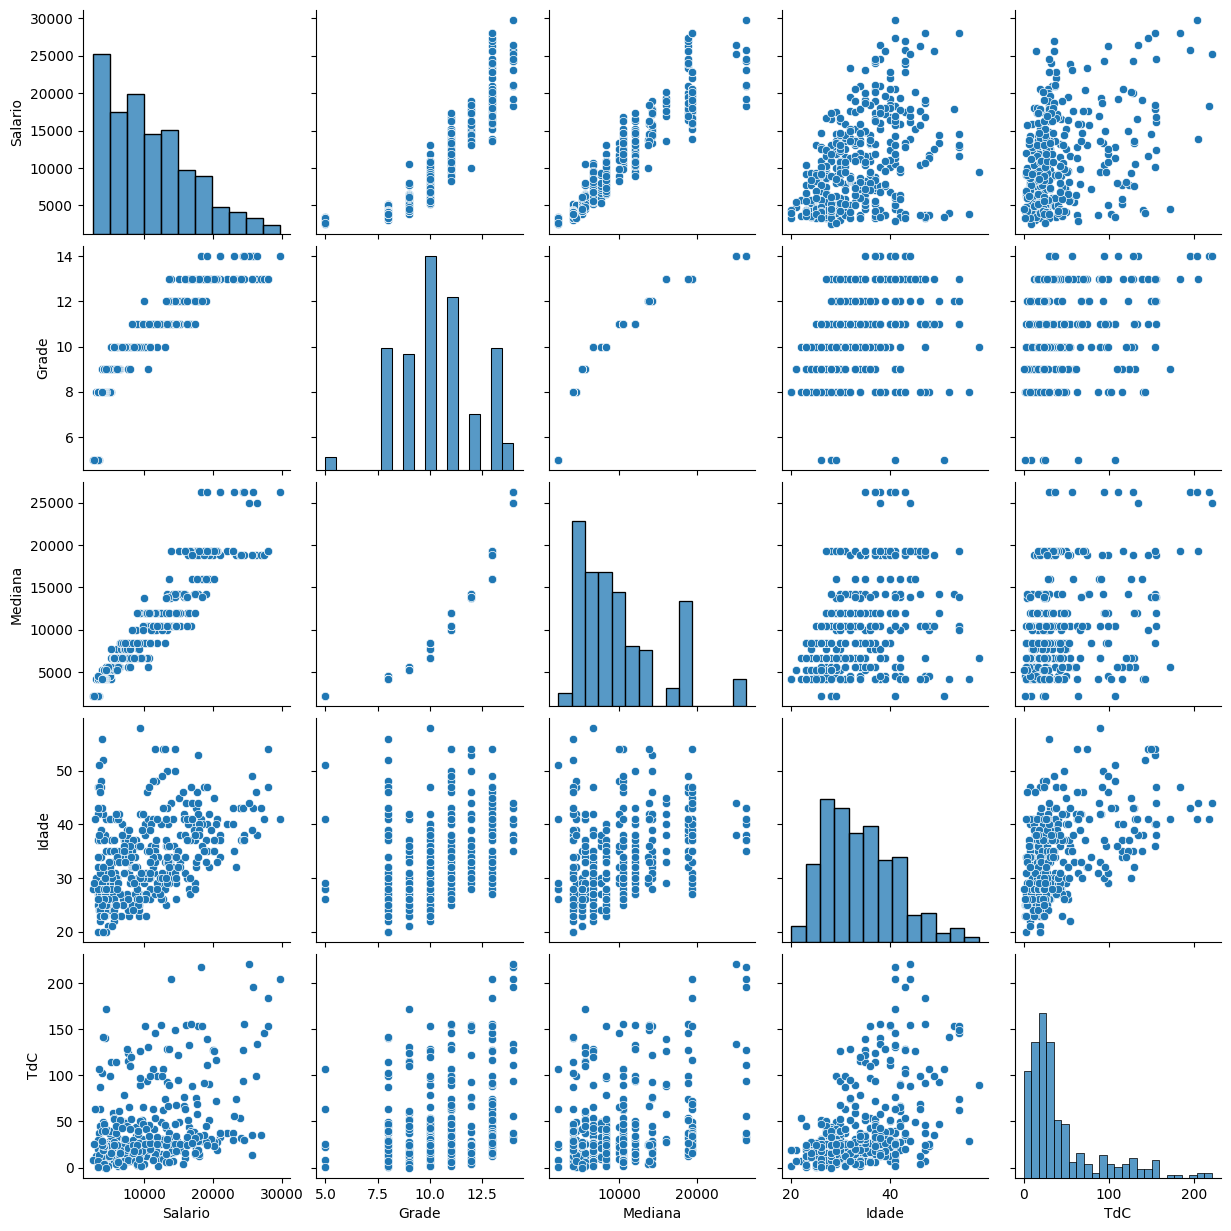

In [66]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(Ativo)


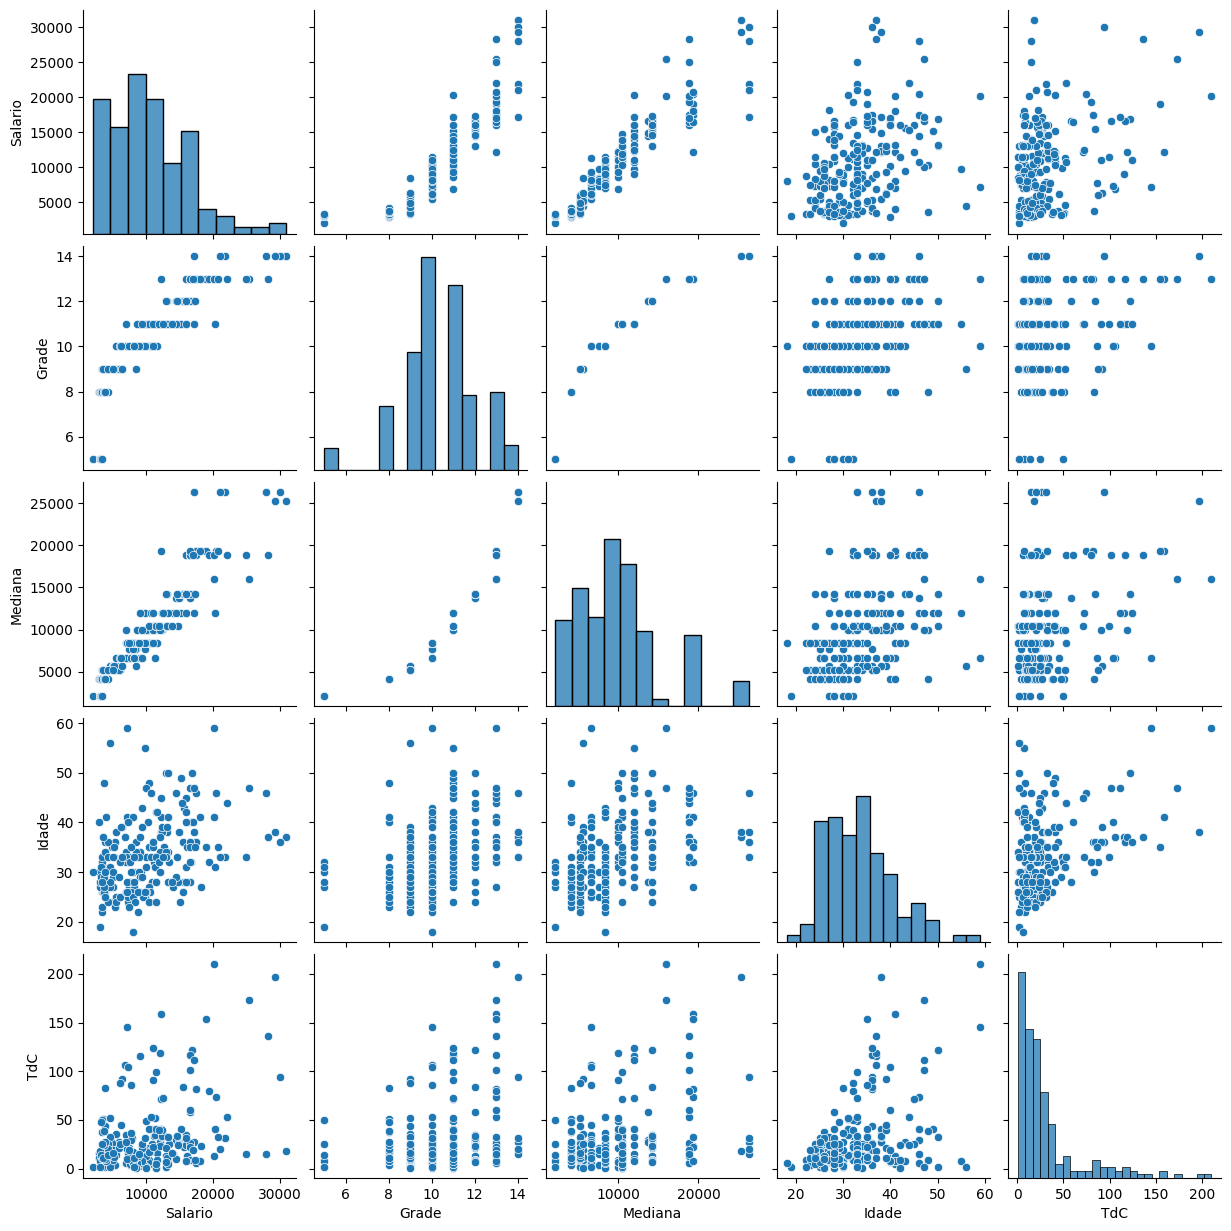

In [67]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(Desl)


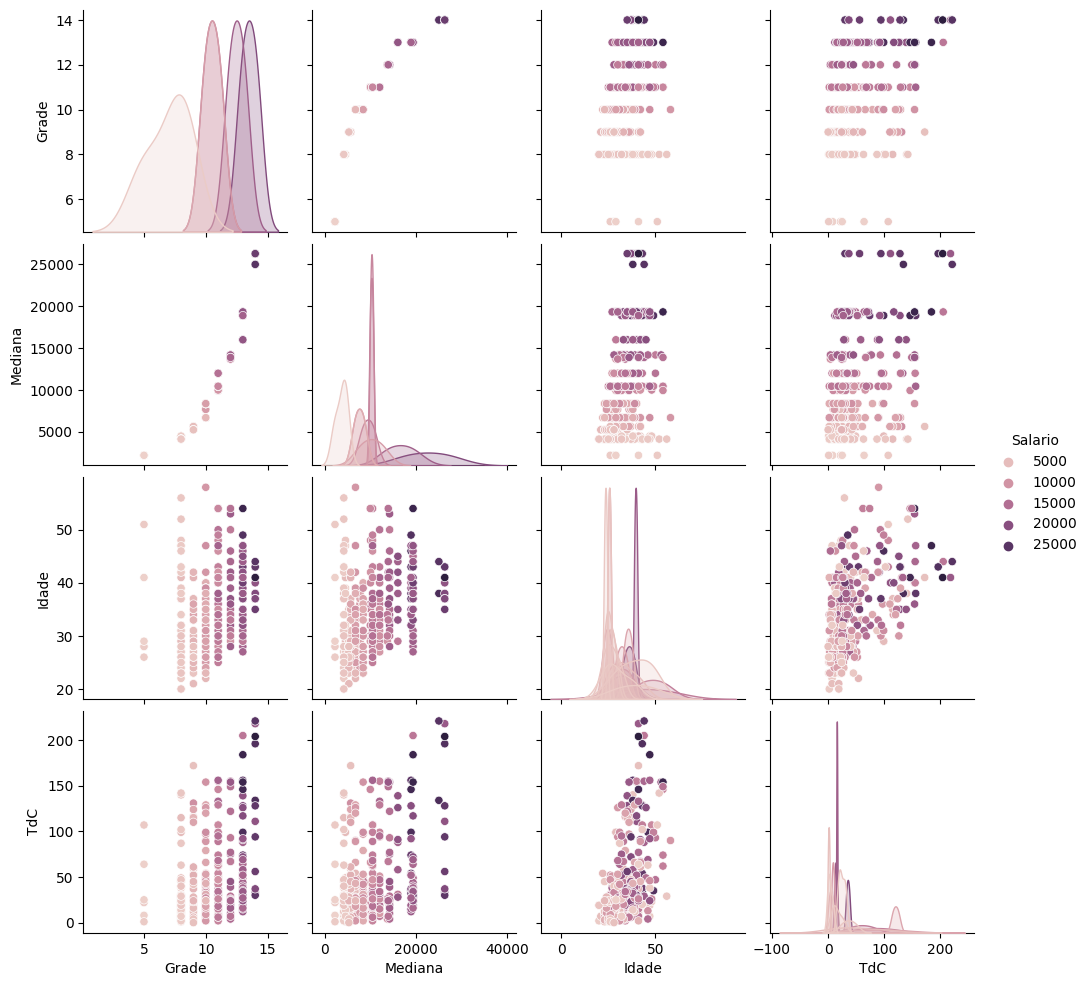

In [68]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(Ativo, hue = "Salario", height = 2.5);

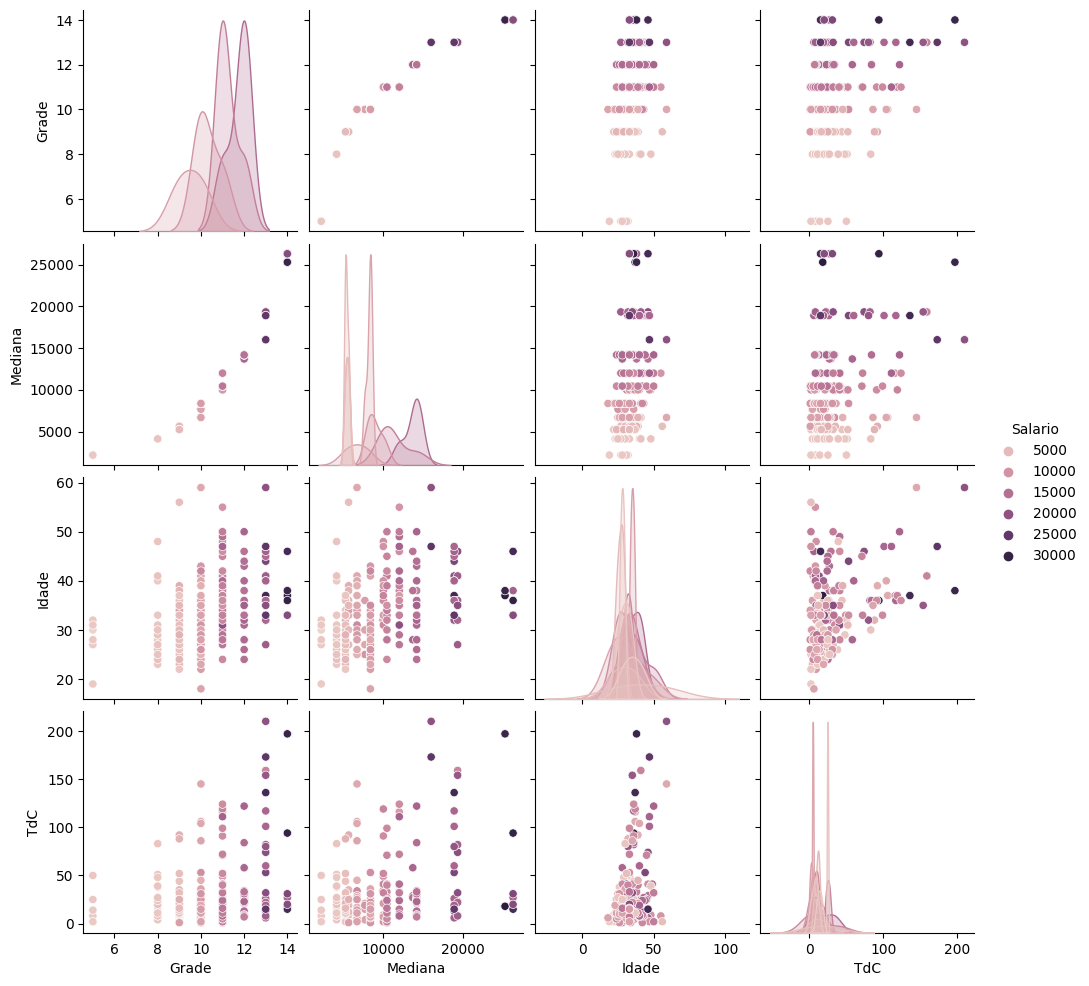

In [69]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(Desl, hue = "Salario", height = 2.5);

Reforçando o que foi notado anteriormente, notamos que dentre os maiores salários, a maior concentração ocorre para menos temps de casa e menor idade, fazendo com que possamos concluir que novos admitidos entram recebendo mais do que funcionários com mais tempo de casa, e como temos maiores salários para menores idades, concluimos que os novos entrantes, de forma geral, possuem uma idade inferior a média atual.

## 4. Pré-Processamento de Dados

Notamos nos dois datasets utilizados que não existem valores missing (faltantes) ou mesmo nulls (nulos).

Mas de qualquer forma, utilizaremos uma visualização matricial para ter certeza que não existe nenhum tratamento adicional necessárionos datasets.


<Axes: >

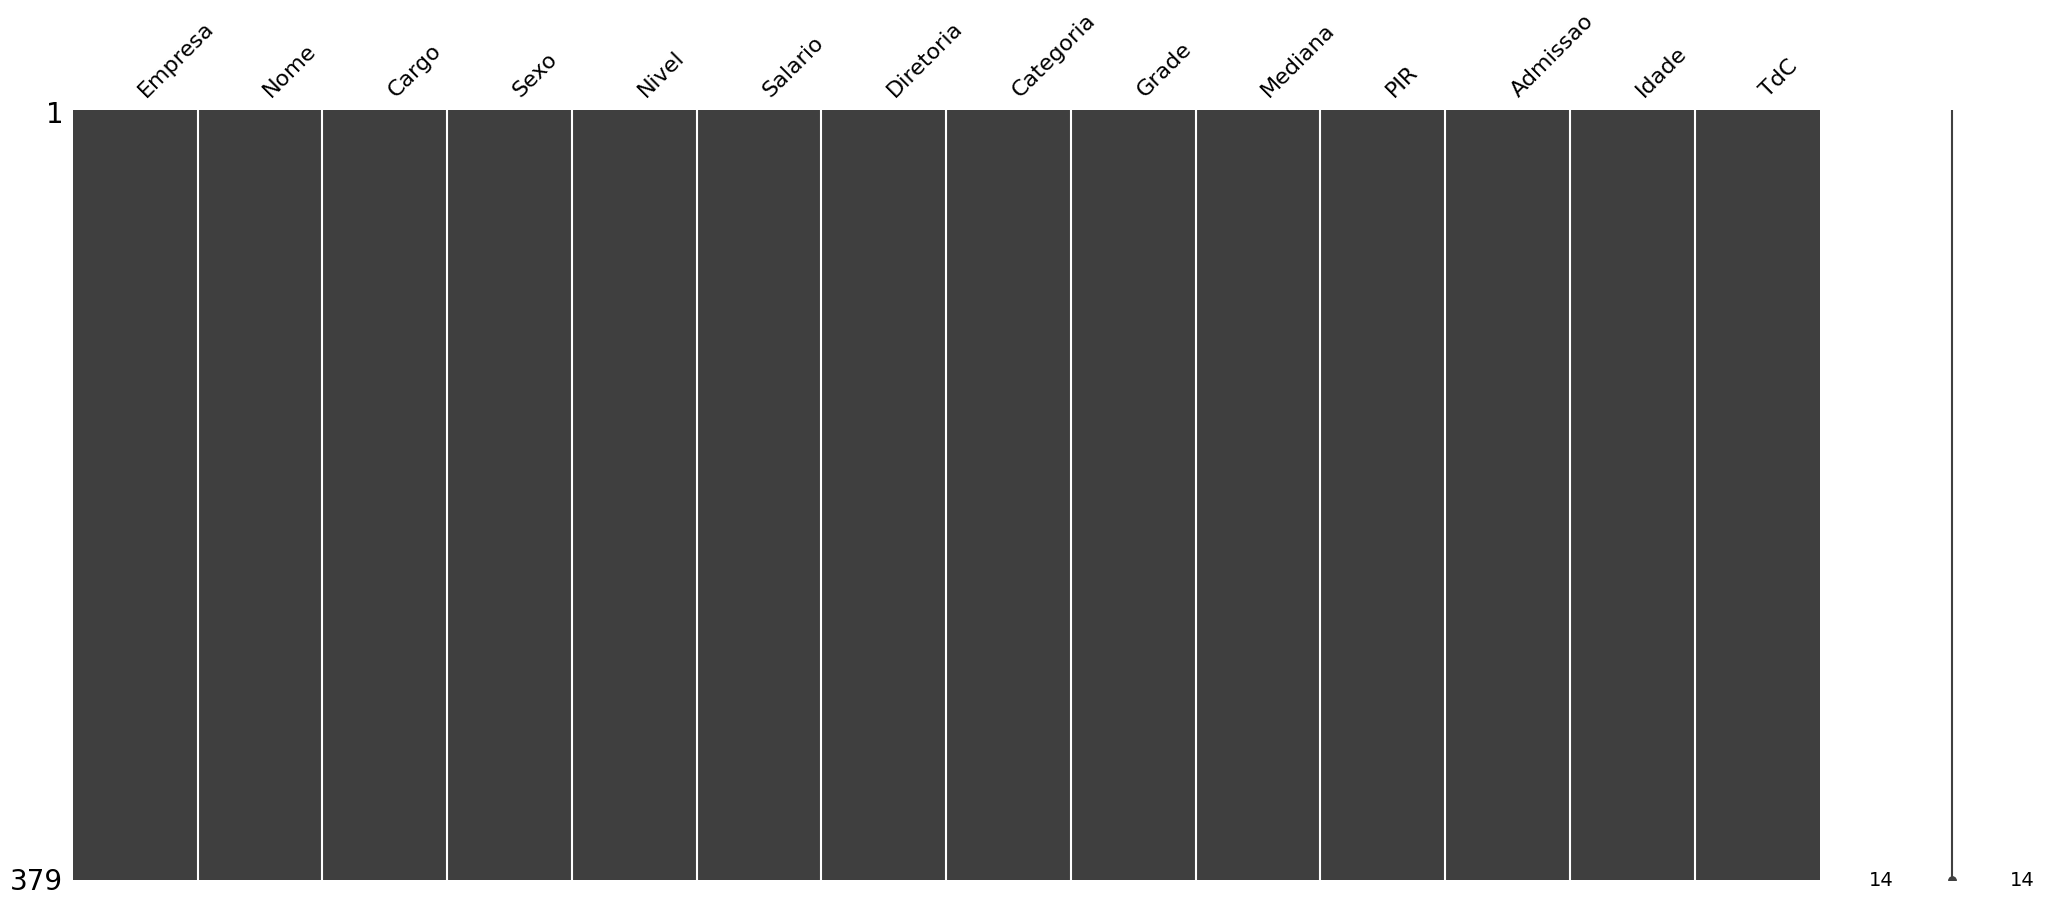

In [70]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(Ativo)

<Axes: >

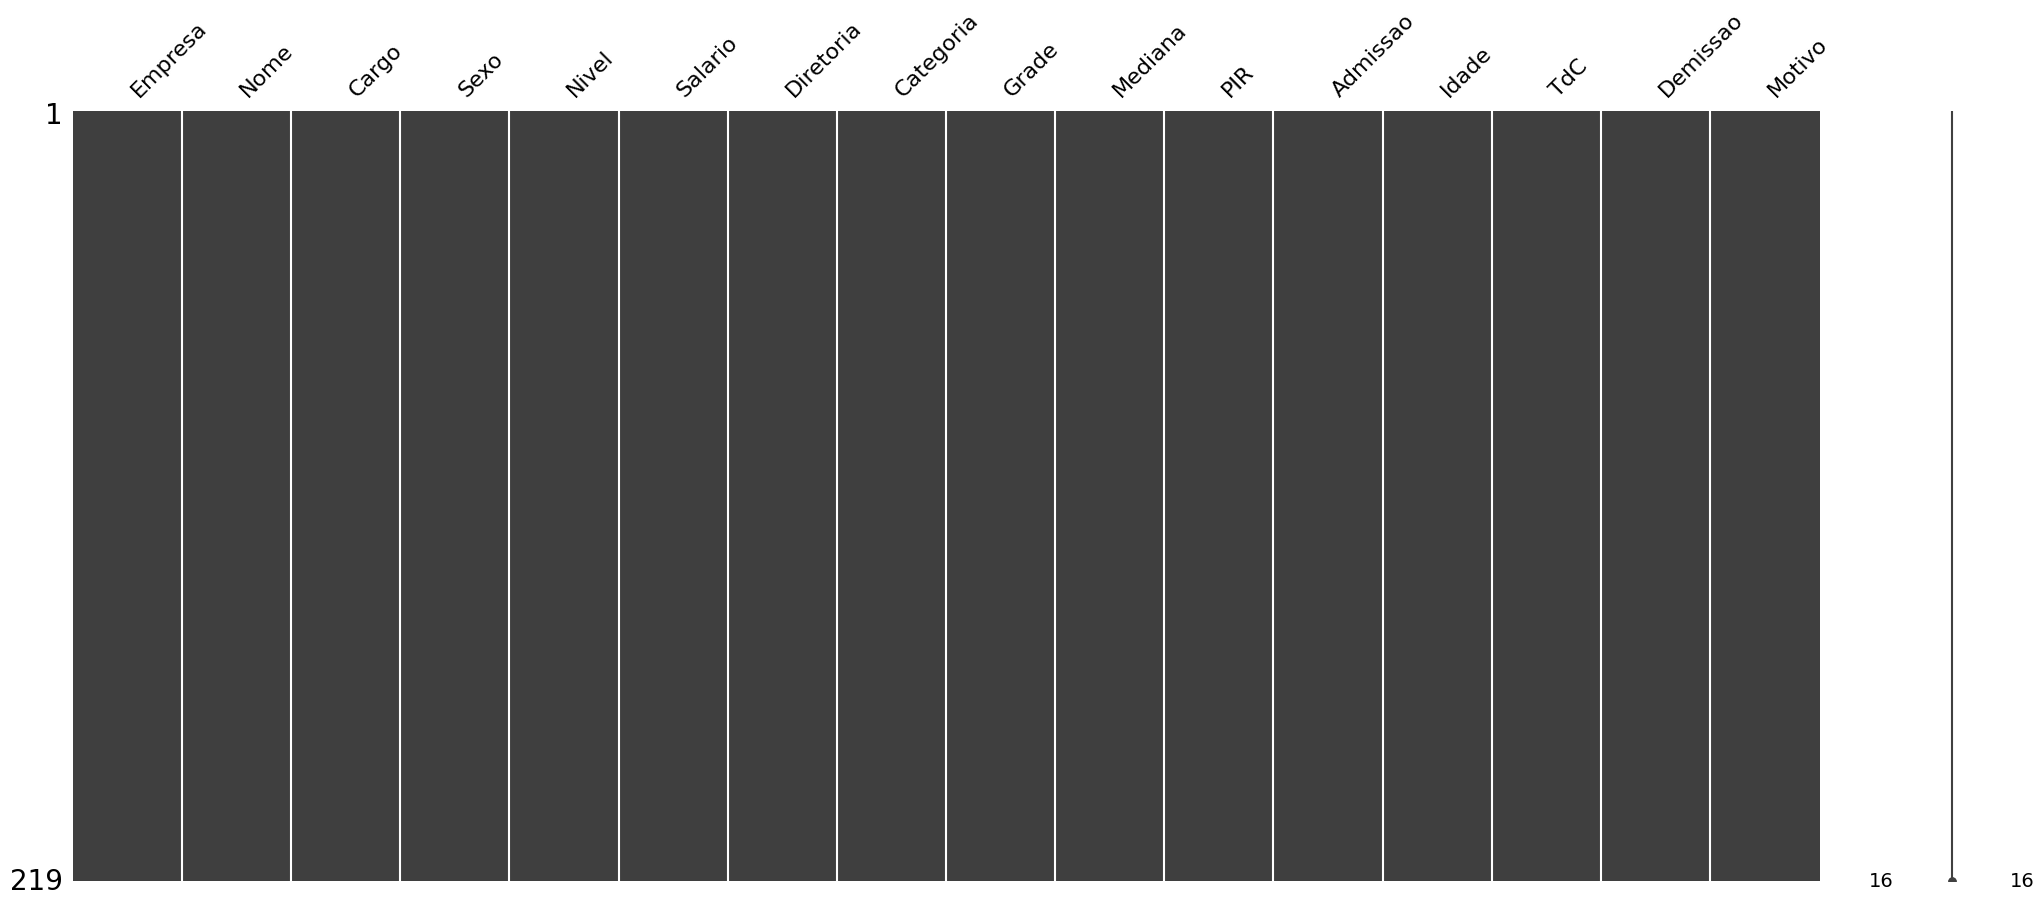

In [71]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(Desl)

Pode-se observar que de fato não existiam tratamentos adicionais a serem realizados.

### 4.1 Separação em conjunto de treino e conjunto de teste

Adotaremos uma prática recomendada ao dividir nosso conjunto de dados em conjuntos de treino e teste. Este método, frequentemente denominado conjunto de teste ou conjunto de validação na literatura, envolve a alocação de uma porção dos dados para avaliar a precisão do modelo final. Reservaremos 20% do nosso conjunto de dados para testes, mantendo 80% para a construção do modelo. Esta divisão será realizada através da estratégia conhecida como train-test-split. Primeiramente, identificaremos as colunas atribuídas às características (X - 0 a 7) e à classe (Y - 8). Em seguida, especificaremos o tamanho desejado para o conjunto de teste e uma semente para assegurar a reprodutibilidade dos resultados. Finalmente, efetuaremos a separação dos conjuntos de treino e teste utilizando o comando train_test_split, o qual resultará em quatro estruturas de dados distintas: atributos e classes para o conjunto de teste, e atributos e classes para o conjunto de treino.

In [72]:
# Base de Ativos
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = Ativo.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

print("Conjunto de Treino:")
print("Atributos de Treino (X_train):", X_train.shape)
print("Classes de Treino (y_train):", y_train.shape)

print("\nConjunto de Teste:")
print("Atributos de Teste (X_test):", X_test.shape)
print("Classes de Teste (y_test):", y_test.shape)

Conjunto de Treino:
Atributos de Treino (X_train): (303, 8)
Classes de Treino (y_train): (303,)

Conjunto de Teste:
Atributos de Teste (X_test): (76, 8)
Classes de Teste (y_test): (76,)


In [73]:
# Base de Desligados
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = Desl.values
X = array[:,0:8]
y = array[:,8]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

print("Conjunto de Treino:")
print("Atributos de Treino (X_train):", X_train.shape)
print("Classes de Treino (y_train):", y_train.shape)

print("\nConjunto de Teste:")
print("Atributos de Teste (X_test):", X_test.shape)
print("Classes de Teste (y_test):", y_test.shape)

Conjunto de Treino:
Atributos de Treino (X_train): (175, 8)
Classes de Treino (y_train): (175,)

Conjunto de Teste:
Atributos de Teste (X_test): (44, 8)
Classes de Teste (y_test): (44,)


## 5. Conclusão

Ao explorarmos os dados salariais da empresa Bemobi, buscamos entender a dinâmica do posicionamento na faixa salarial (PIR) e sua possível correlação com as solicitações de desligamento. Surpreendentemente, a análise revelou que não há uma relação direta entre o posicionamento na faixa salarial e as decisões de desligamento por parte dos colaboradores.

Contudo, um insight valioso emergiu durante a investigação: foi observada uma tendência intrigante entre os novos admitidos e aqueles com maior tempo de casa. Parece haver uma disparidade salarial, onde os recém-chegados muitas vezes ingressam na empresa com remunerações mais elevadas do que seus colegas com uma história mais longa na organização.

Essa observação sugere um possível ponto de atenção no que diz respeito à satisfação dos colaboradores mais antigos. A disparidade salarial, se não adequadamente gerenciada, pode levar a sentimentos de descontentamento e afetar negativamente a moral e a retenção de talentos.

Este estudo inicial fornece uma base sólida para análises mais aprofundadas e estratégias de gestão de talentos. Recomendamos a realização de pesquisas adicionais para compreender as percepções dos colaboradores em relação à sua remuneração e desenvolver políticas salariais que promovam a equidade e a satisfação, contribuindo assim para um ambiente de trabalho mais saudável e sustentável.

Em última análise, este MVP não apenas oferece insights valiosos sobre a dinâmica salarial na Bemobi, mas também destaca a importância contínua de monitorar e adaptar estratégias de remuneração para garantir a motivação e a retenção eficaz de talentos.

